# AE 370 Project 1 - A Numerical Method for a Dynamical System
  
**Group Members:**  
- Elijah Lewis 
- Raghav Mansharamani
- Matthew Greenstein
- Jackson Rees

---

## Project Overview
In this project, we investigate an engineering-relevant dynamical system and apply a numerical method to explore its behavior.  

The problem we chose was...

---

## Repository Structure

```text
AE_370_Project_1/
│
├── source/
│   ├── reactions.py          # ODEs and reaction kinetics
│   ├── numerical_methods.py  # Integration algorithms (RK4, AB3)
│   ├── convergence_tests.py  # Error and stability validation
│   └── plotting_utils.py     # Visualization and post-processing
│
├── main.ipynb                # Main notebook (this file)
├── data/                     # Initial condition files
├── results/                  # Generated plots and figures
├── README.md
├── project_requirements.pdf
├── requirements.txt
└── .gitignore
```

---
## Acknowledgements

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt


# Import functions
from source.reactions import *
from source.numerical_methods import *
#from source.convergence_tests import *
from source.plotting_utils import *
from source.eoms import *


# Defining the Dynamical System

---


In [2]:
# initial state: x, xdot, theta, thetadot
u0 = [0, 0, np.pi/6, 0]

# run Euler integration
#t, u = euler_forward(skycrane, u0, dt=0.01, t_final=10.0)
#t_damp, u_damp = euler_forward(skycrane_damping, u0, dt=0.01, t_final=10.0)

#run ab3
U, T = ab3_solve(skycrane, u0, 0.01, 10)
u_dmp, t_dmp = ab3_solve(skycrane_damping, u0, 0.01, 10)



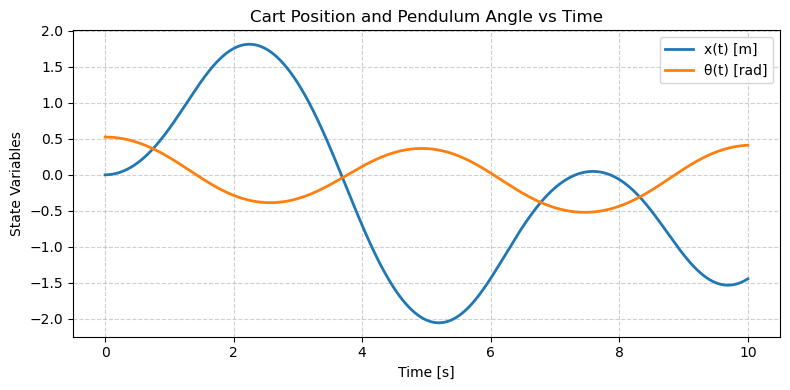

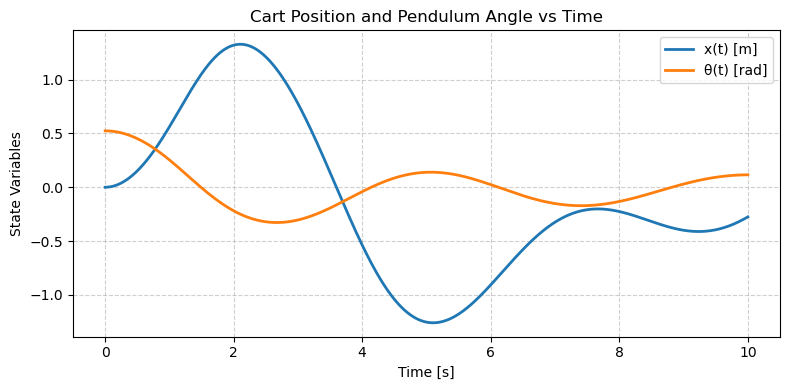

In [3]:
#plot position and angle vs time using ab3 method
plot_x_theta(T, U)
plot_x_theta(t_dmp, u_dmp)

In [4]:
# from source.plotting_utils import animate_skycrane

# # after integration
# ani = animate_skycrane(t, u, constants, skip=1)

# # optionally save to file
# animate_skycrane(t, u, constants, save_path="skycrane.gif")


# Error Convergence Test for AB3 Method

--- 

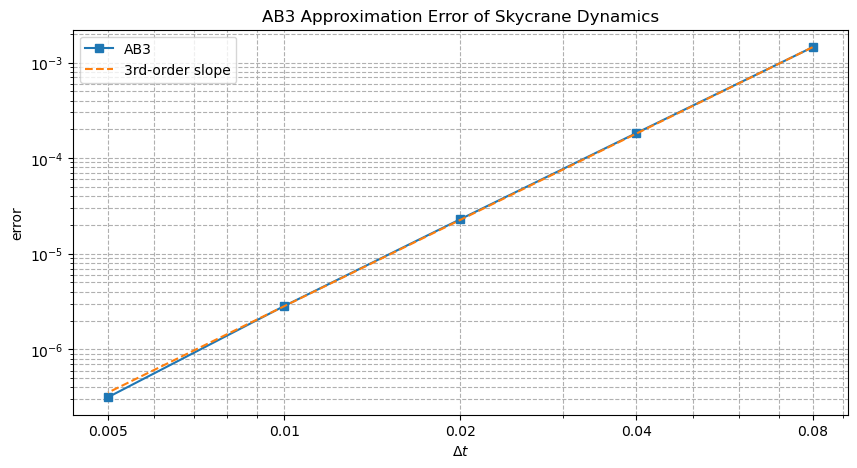

In [11]:
#Error convergence test for AB3 method
from source.convergence_tests import * 

delta_t = [8e-2, 4e-2, 2e-2, 1e-2, 5e-3]
delta_t_baseline = 2.5e-3
T_final = 4

error = []
for dt in delta_t:
    e_ab3 = ivp_ab3_error(u0, T_final, dt, delta_t_baseline)
    error.append(e_ab3)

slope = (np.array(delta_t)/delta_t[0])**3 * error[0]


# Plot error along with calculated slope
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.loglog(delta_t, error, label='AB3', marker='s')
ax.loglog(delta_t, slope, '--', label='3rd-order slope')
ax.set_xlabel(r'$\Delta t$')
ax.set_ylabel('error')
ax.set_xticks([8e-2, 4e-2, 2e-2, 1e-2, 5e-3],[8e-2, 4e-2, 2e-2, 1e-2, 5e-3])
ax.legend()
ax.set_title('AB3 Approximation Error of Skycrane Dynamics')
ax.grid(which='both', linestyle='--')
plt.show()